In [57]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline 


In [58]:
print(cv2.__version__)

4.4.0


In [59]:
def plot_img(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1= fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")#converting images to grayscale which is faster compared to coloured pictures
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2= fig.add_subplot(121)
    ax1.imshow(img2, cmap="gray")#converting images to grayscale which is faster compared to coloured pictures
    ax1.set(xticks=[], yticks=[], title=title2)

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


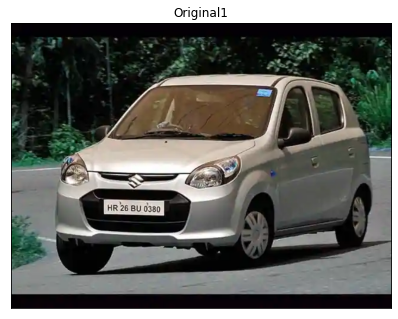

In [60]:
path = "./images/car2.png"
image = cv2.imread(path)
plot_img(image,image,title1='Original', title2='Original1')

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


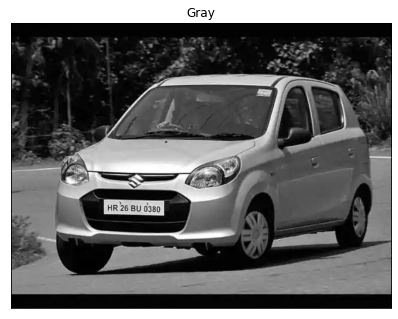

In [61]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plot_img(image,gray,title1='original', title2 ="Gray")

In [62]:
#we use blur to make sure that the background has less detailing, which helps focussing  on actual image 
blur = cv2.bilateralFilter(gray,11,90,90)

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


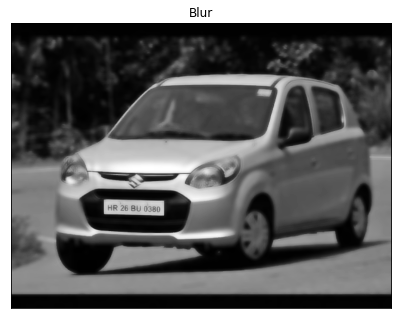

In [63]:
plot_img(gray,blur,title1="Gray", title2="Blur")

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


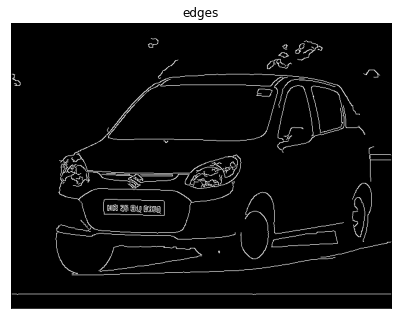

In [64]:
#edge detection 
#we do edge detection is that draws filters horizontally and vertically 
#Edge detection is an image processing technique for finding the boundaries of objects within images. 
#It works by detecting discontinuities in brightness. Edge detection 
#is used for image segmentation and data extraction in areas such as
#image processing, computer vision, and machine vision.

edge = cv2.Canny(blur,30,200)
plot_img(blur, edge, title1="blur" ,title2= "edges")

In [65]:
#Contours can be explained simply as a curve joining all the continuous points (along the boundary), 
#having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition
#there are three arguments, first one is source image, second is contour retrieval mode, third is contour approximation method. And it outputs the contours and hierarchy. Contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.
cnts , new = cv2.findContours(edge.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

In [66]:
type(cnts)

list

In [67]:
image_copy = image.copy()

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


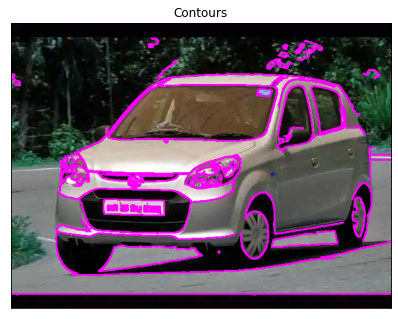

In [68]:
_ = cv2.drawContours(image_copy, cnts , -1 , (255,0,255), 2)
plot_img(edge , image_copy , title1="Edges" , title2="Contours")

In [69]:
print(len(cnts))

104


In [70]:
cnts = sorted(cnts, key=cv2.contourArea, reverse= True)[:10]

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


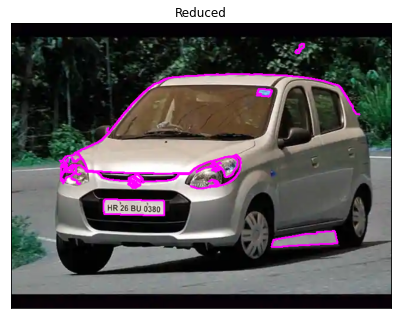

In [71]:
image_reduced_contours = image.copy()
_ = cv2.drawContours(image_reduced_contours, cnts , -1 , (255,0,255), 2)
plot_img(image_copy ,image_reduced_contours, title1="Contours" , title2="Reduced")

In [72]:
plate = None 
for c in cnts: 
    perimeter = cv2.arcLength(c,True)
    edge_count = cv2.approxPolyDP(c,0.02*perimeter , True) # approximate the number of sides
    if len(edge_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h , x:x+w]
        break 
cv2.imwrite('plate.png' , plate)
        

True

C:\Users\punna\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


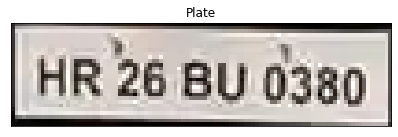

In [73]:
plot_img(plate,plate , title1="plate" , title2='Plate')

In [74]:

import pytesseract

pytesseract.pytesseract.tesseract_cmd = "C:/Program Files/Tesseract-OCR/tesseract.exe"

#text = pytesseract.image_to_string (plate , lang="eng")
text = pytesseract.image_to_string(plate,config ='--psm 7')


In [75]:
print(text)

HR 26 BU 0380

